I'm choosing to gather the best neighborhood for dogs based on the amount of parks in the neighborhood. I'm doing to do so by determining the acreage of parks per neighborhood.

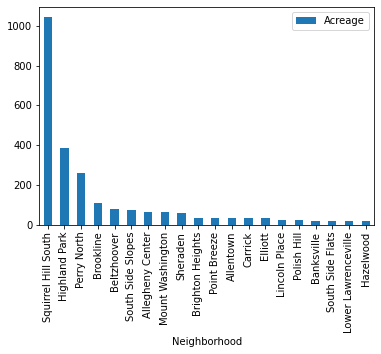

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

parkDict = {}

def addToDict(name, acreage):
    parkDict[name] = acreage

parkData = pd.read_csv("park-data.csv")#.sort_values(by=['acreage'], ascending=False)
for index, row in parkData.iterrows():
    acreage = row['acreage']
    parkDict[row['origpkname']] = acreage
    parkDict[row['updatepknm']] = acreage
    parkDict[row['alterntnam']] = acreage

neighDict = {}

links = pd.read_csv("neighborhood-links.csv")
for index, row in links.iterrows():
    if row['name'] in parkDict:
        if row['neighborhood'] in neighDict:
            neighDict[row['neighborhood']] += parkDict[row['name']]
        else:
            neighDict[row['neighborhood']] = parkDict[row['name']]

df = pd.DataFrame(list(neighDict.items()),columns = ['Neighborhood','Acreage']) 

df.sort_values(by=['Acreage'], ascending=False).head(20).plot.bar(x='Neighborhood', y='Acreage')